In [1]:
import pandas as pd

In [2]:
pd.DataFrame({'Yes':[50,21],'No':[1,2]},index=['A','B'])

,Yes,No
A,50,1
B,21,2


In [3]:
pd.Series([1,2,3,4,5],index=['a','b','c','d','e'],name="Anik")

a    1
b    2
c    3
d    4
e    5
Name: Anik, dtype: int64

In [4]:
reviews=pd.read_csv("D:/ML/titanic/winemag-data.csv",index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
reviews.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [6]:
reviews.points.describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [7]:
reviews.taster_name.describe()

count         103727
unique            19
top       Roger Voss
freq           25514
Name: taster_name, dtype: object

In [8]:
reviews.points.mean()

88.44713820775404

In [9]:
reviews.taster_name.unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

In [10]:
reviews.taster_name.value_counts()

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [11]:
rpmean = reviews.points.mean()
reviews.points.map(lambda p:p-rpmean)

0        -1.447138
1        -1.447138
2        -1.447138
3        -1.447138
4        -1.447138
            ...   
129966    1.552862
129967    1.552862
129968    1.552862
129969    1.552862
129970    1.552862
Name: points, Length: 129971, dtype: float64

In [12]:
def remean_points(row):
    row.points=row.points-rpmean
    return row

reviews.apply(remean_points,axis='columns')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,-1.447138,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,-1.447138,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,-1.447138,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,-1.447138,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,-1.447138,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,1.552862,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,1.552862,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,1.552862,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,1.552862,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [13]:
reviews.country+"-"+reviews.region_1

0                     Italy-Etna
1                            NaN
2           US-Willamette Valley
3         US-Lake Michigan Shore
4           US-Willamette Valley
                   ...          
129966                       NaN
129967                 US-Oregon
129968             France-Alsace
129969             France-Alsace
129970             France-Alsace
Length: 129971, dtype: object

In [14]:
reviews.price.dtypes

dtype('float64')

In [15]:
reviews.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [16]:
reviews.points.dtype

dtype('int64')

In [17]:
reviews.points.astype('float64')

0         87.0
1         87.0
2         87.0
3         87.0
4         87.0
          ... 
129966    90.0
129967    90.0
129968    90.0
129969    90.0
129970    90.0
Name: points, Length: 129971, dtype: float64

In [18]:
reviews.points.dtype

dtype('int64')

In [19]:
reviews[pd.isnull(reviews.country)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124176,NaN,This Swiss red blend is composed of four varie...,Les Romaines,90,30.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Les Frères Dutruy 2014 Les Romaines Red,Red Blend,Les Frères Dutruy
129407,NaN,Dry spicy aromas of dusty plum and tomato add ...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Cabernet Sauvignon,Cabernet Sauvignon,El Capricho
129408,NaN,El Capricho is one of Uruguay's more consisten...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tempranillo,Tempranillo,El Capricho
129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ


In [20]:
reviews.country.fillna('Unknown')

0            Italy
1         Portugal
2               US
3               US
4               US
            ...   
129966     Germany
129967          US
129968      France
129969      France
129970      France
Name: country, Length: 129971, dtype: object

In [21]:
reviews.taster_twitter_handle.replace("@kerinokeefe","@kerino")

0             @kerino
1          @vossroger
2         @paulgwine 
3                 NaN
4         @paulgwine 
             ...     
129966            NaN
129967    @paulgwine 
129968     @vossroger
129969     @vossroger
129970     @vossroger
Name: taster_twitter_handle, Length: 129971, dtype: object

In [22]:
reviews.groupby('points').points.count()

points
80       397
81       692
82      1836
83      3025
84      6480
85      9530
86     12600
87     16933
88     17207
89     12226
90     15410
91     11359
92      9613
93      6489
94      3758
95      1535
96       523
97       229
98        77
99        33
100       19
Name: points, dtype: int64

In [23]:
reviews.groupby('points').price.min() # to get the cheapest wine in each point value category

points
80      5.0
81      5.0
82      4.0
83      4.0
84      4.0
85      4.0
86      4.0
87      5.0
88      6.0
89      7.0
90      8.0
91      7.0
92     11.0
93     12.0
94     13.0
95     20.0
96     20.0
97     35.0
98     50.0
99     44.0
100    80.0
Name: price, dtype: float64

In [24]:
reviews.groupby('winery').apply(lambda df:df.title.iloc[0])

winery
1+1=3                                     1+1=3 NV Rosé Sparkling (Cava)
10 Knots                            10 Knots 2010 Viognier (Paso Robles)
100 Percent Wine              100 Percent Wine 2015 Moscato (California)
1000 Stories           1000 Stories 2013 Bourbon Barrel Aged Zinfande...
1070 Green                  1070 Green 2011 Sauvignon Blanc (Rutherford)
                                             ...                        
Órale                       Órale 2011 Cabronita Red (Santa Ynez Valley)
Öko                    Öko 2013 Made With Organically Grown Grapes Ma...
Ökonomierat Rebholz    Ökonomierat Rebholz 2007 Von Rotliegenden Spät...
àMaurice               àMaurice 2013 Fred Estate Syrah (Walla Walla V...
Štoka                                    Štoka 2009 Izbrani Teran (Kras)
Length: 16757, dtype: object

In [25]:
reviews.groupby(['country','province']).apply(lambda df:df.loc[df.points.idxmax()])

country  \
country   province                      
Argentina Mendoza Province  Argentina   
          Other             Argentina   
Armenia   Armenia             Armenia   
Australia Australia Other   Australia   
          New South Wales   Australia   
...                               ...   
Uruguay   Juanico             Uruguay   
          Montevideo          Uruguay   
          Progreso            Uruguay   
          San Jose            Uruguay   
          Uruguay             Uruguay   

                                                                  description  \
country   province                                                              
Argentina Mendoza Province  If the color doesn't tell the full story, the ...   
          Other             Take note, this could be the best wine Colomé ...   
Armenia   Armenia           Deep salmon in color, this wine offers a bouqu...   
Australia Australia Other   Writes the book on how to make a wine filled w...   
          New South Wales   De Bortoli's Noble One is as good as ever in 2...   
...                                                                       ...   
Uruguay   Juanico           This mature Bordeaux-style blend is earthy on ...   
          Montevideo        A rich, heady bouquet offers aromas of blackbe...   
          Progreso          Rusty in color but deep and complex in nature,...   
          San Jose          Baked, sweet, heavy aromas turn earthy with ti...   
          Uruguay           Cherry and berry aromas are ripe, healthy and ...   

                                                        designation  points  \
country   province                                                            
Argentina Mendoza Province                         Nicasia Vineyard      97   
          Other                                             Reserva      95   
Armenia   Armenia                                    Estate Bottled      88   
Australia Australia Other                             Sarah's Blend      93   
          New South Wales                        Noble One Bortytis      94   
...                                                             ...     ...   
Uruguay   Juanico                  Preludio Barrel Select Lote N 77      90   
          Montevideo        Monte Vide Eu Tannat-Merlot-Tempranillo      91   
          Progreso                   Etxe Oneko Fortified Sweet Red      90   
          San Jose                         El Preciado Gran Reserva      87   
          Uruguay                         Blend 002 Limited Edition      91   

                            price          province                 region_1  \
country   province                                                             
Argentina Mendoza Province  120.0  Mendoza Province                  Mendoza   
          Other              90.0             Other                    Salta   
Armenia   Armenia            15.0           Armenia                      NaN   
Australia Australia Other    15.0   Australia Other  South Eastern Australia   
          New South Wales    32.0   New South Wales          New South Wales   
...                           ...               ...                      ...   
Uruguay   Juanico            45.0           Juanico                      NaN   
          Montevideo         60.0        Montevideo                      NaN   
          Progreso           46.0          Progreso                      NaN   
          San Jose           50.0          San Jose                      NaN   
          Uruguay            22.0           Uruguay                      NaN   

                           region_2        taster_name taster_twitter_handle  \
country   province                                                             
Argentina Mendoza Province      NaN  Michael Schachner           @wineschach   
          Other                 NaN  Michael Schachner           @wineschach   
Armenia   Armenia               NaN      Mike DeSimon

In [26]:
reviews.groupby('country').price.agg([len,min,max])

,len,min,max
country,,,
Argentina,3800,4.0,230.0
Armenia,2,14.0,15.0
Australia,2329,5.0,850.0
Austria,3345,7.0,1100.0
Bosnia and Herzegovina,2,12.0,13.0
Brazil,52,10.0,60.0
Bulgaria,141,8.0,100.0
Canada,257,12.0,120.0
Chile,4472,5.0,400.0


In [27]:
countries_reviewed=reviews.groupby('country').price.agg([len])
countries_reviewed

,len
country,
Argentina,3800
Armenia,2
Australia,2329
Austria,3345
Bosnia and Herzegovina,2
Brazil,52
Bulgaria,141
Canada,257
Chile,4472


In [28]:
countries_reviewed=countries_reviewed.reset_index()
countries_reviewed.sort_values(by='len',ascending=False)

,country,len
40,US,54504
15,France,22093
22,Italy,19540
37,Spain,6645
31,Portugal,5691
8,Chile,4472
0,Argentina,3800
3,Austria,3345
2,Australia,2329
17,Germany,2165


In [29]:
countries_reviewed.sort_index()

,country,len
0,Argentina,3800
1,Armenia,2
2,Australia,2329
3,Austria,3345
4,Bosnia and Herzegovina,2
5,Brazil,52
6,Bulgaria,141
7,Canada,257
8,Chile,4472
9,China,1


In [30]:
reviews.rename( columns={ 'points':'score'})

,country,description,designation,score,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [31]:
reviews.rename_axis("wines", axis='rows').rename_axis("fields", axis='columns')

fields,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
wines,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [33]:
df=pd.read_csv("D:/ML/titanic/concrete.csv")
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [34]:
X=df.copy()
y=X.pop('CompressiveStrength')

In [35]:
X.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [36]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: CompressiveStrength, dtype: float64

In [37]:
baseline=RandomForestRegressor(criterion="mae",random_state=0)
baseline_score=cross_val_score(baseline,X,y,cv=5,scoring="neg_mean_absolute_error")
baseline_score=-1*baseline_score.mean()
print(f"MAE Baseline Score: {baseline_score:.4}")

MAE Baseline Score: 8.232


In [38]:


X = df.copy()
y = X.pop("CompressiveStrength")

In [39]:
# Create synthetic features
X["FCRatio"] = X["FineAggregate"] / X["CoarseAggregate"]
X["AggCmtRatio"] = (X["CoarseAggregate"] + X["FineAggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]

In [40]:
# Train and score model on dataset with additional ratio features
model = RandomForestRegressor(criterion="mae", random_state=0)
score = cross_val_score(
    model, X, y, cv=5, scoring="neg_mean_absolute_error"
)
score = -1 * score.mean()

print(f"MAE Score with Ratio Features: {score:.4}")

MAE Score with Ratio Features: 7.948


In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
plt.style.use("seaborn-whitegrid")

In [43]:
df=pd.read_csv("D:/ML/titanic/autos.csv")
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [44]:
X=df.copy()
y=X.pop("price")
X.dtypes

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_of_doors           int64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio      int64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
dtype: object

In [45]:
for colname in X.select_dtypes("object"):
    X[colname], _ =X[colname].factorize()

In [46]:
X.dtypes

symboling              int64
make                   int64
fuel_type              int64
aspiration             int64
num_of_doors           int64
body_style             int64
drive_wheels           int64
engine_location        int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type            int64
num_of_cylinders       int64
engine_size            int64
fuel_system            int64
bore                 float64
stroke               float64
compression_ratio      int64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
dtype: object

In [47]:
discrete_features = (X.dtypes=="int64")

In [48]:
discrete_features

symboling             True
make                  True
fuel_type             True
aspiration            True
num_of_doors          True
body_style            True
drive_wheels          True
engine_location       True
wheel_base           False
length               False
width                False
height               False
curb_weight           True
engine_type           True
num_of_cylinders      True
engine_size           True
fuel_system           True
bore                 False
stroke               False
compression_ratio     True
horsepower            True
peak_rpm              True
city_mpg              True
highway_mpg           True
dtype: bool

In [49]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X,y,discrete_features):
    mi_scores=mutual_info_regression(X,y,discrete_features=discrete_features)
    mi_scores=pd.Series(mi_scores,name="MI scores",index=X.columns)
    mi_scores=mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores=make_mi_scores(X,y,discrete_features)
mi_scores

curb_weight          1.465434
horsepower           1.253029
engine_size          0.999367
highway_mpg          0.951327
city_mpg             0.859931
width                0.675776
length               0.613707
wheel_base           0.580587
make                 0.544947
bore                 0.491621
fuel_system          0.485098
peak_rpm             0.448790
stroke               0.385107
height               0.367193
drive_wheels         0.332695
num_of_cylinders     0.329184
symboling            0.228734
engine_type          0.151544
compression_ratio    0.131862
aspiration           0.087994
body_style           0.080786
fuel_type            0.048120
engine_location      0.035905
num_of_doors         0.012705
Name: MI scores, dtype: float64

In [50]:
X.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
1,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
2,1,0,0,0,2,1,0,0,94.5,171.2,...,6,152,0,2.68,3.47,9,154,5000,19,26
3,2,1,0,0,4,2,1,0,99.8,176.6,...,4,109,0,3.19,3.40,10,102,5500,24,30
4,2,1,0,0,4,2,2,0,99.4,176.6,...,5,136,0,3.19,3.40,8,115,5500,18,22


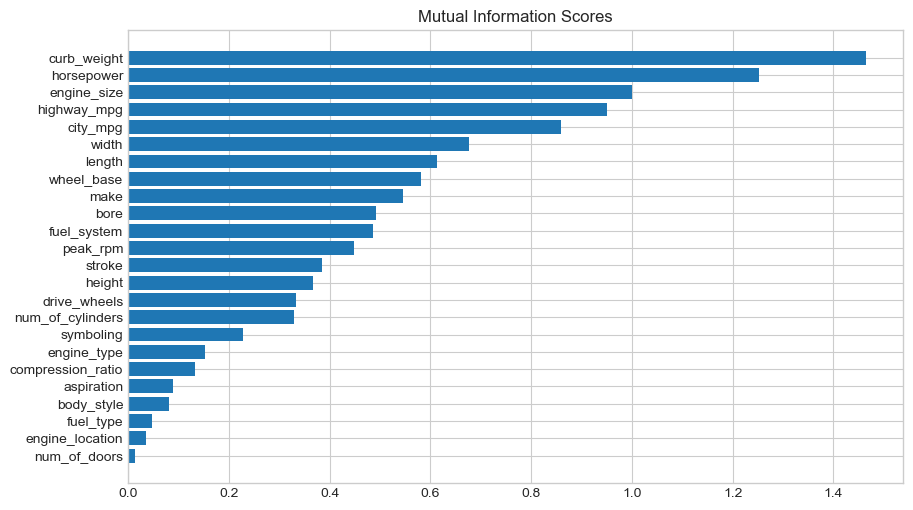

In [52]:
def plot_mi_scores(scores):
    scores=scores.sort_values(ascending=True)
    width=np.arange(len(scores))
    ticks=list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100,figsize=(10,6))
plot_mi_scores(mi_scores)

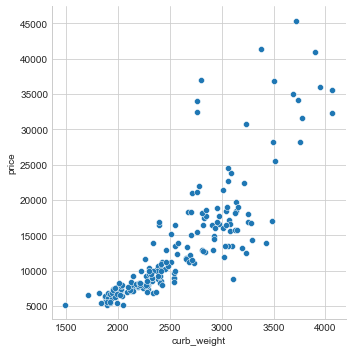

In [53]:
import seaborn as sns
sns.relplot(x="curb_weight",y="price",data=df)

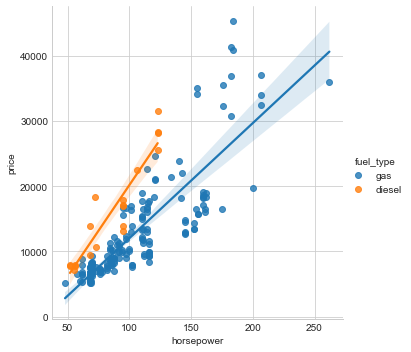

In [54]:


sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df);

